In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy 
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from scipy.spatial.distance import cosine, correlation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Perceptron

In [2]:
df  = pd.read_csv('/Users/hiteshbhatia/Downloads/chs2014_public.csv')

**Pre Processing the Data**
We will first proceed with doing the analysis on the HIV Testing. We will be analysing the HIV with the general health as the target variable.

In [3]:
hiv_df = df[['cid','hiv12months14','everhivtest14','generalhealth']]
#Checking the null values
hiv_df.isnull().sum()

cid                0
hiv12months14    202
everhivtest14    282
generalhealth     62
dtype: int64

In [4]:
#Dropping all the columns having the Null values
hiv_df = hiv_df.dropna()
hiv_df.describe()

,cid,hiv12months14,everhivtest14,generalhealth
count,8.110000e+03,8110.000000,8110.000000,8110.000000
mean,1.507125e+06,1.672133,1.365475,2.685450
std,5.129777e+03,0.469465,0.481593,1.128045
min,1.500001e+06,1.000000,1.000000,1.000000
25%,1.502162e+06,1.000000,1.000000,2.000000
50%,1.504310e+06,2.000000,1.000000,3.000000
75%,1.512108e+06,2.000000,2.000000,3.000000
max,1.514240e+06,2.000000,2.000000,5.000000


In [5]:
corr_1 = hiv_df.corr()
corr_1

,cid,hiv12months14,everhivtest14,generalhealth
cid,1.000000,-0.125867,-0.116881,-0.038125
hiv12months14,-0.125867,1.000000,0.530060,-0.014994
everhivtest14,-0.116881,0.530060,1.000000,0.029357
generalhealth,-0.038125,-0.014994,0.029357,1.000000


It seems like the variable **hiv12months14** (Have you had an HIV test in the last 12 months?) is very less correlated and thus can be dropped.

# Prediction / RMSE

In [6]:
#[1]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#[2]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.random_projection import sparse_random_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from math import sqrt

#function for rmse calculation of model
def model_apply(x,y,algo,n):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(x_train)
    # Apply transform to both the training set and the test set.
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    pca = PCA(n_components=n,tol=.95)
    pca.fit(x_test)
    print(pca.explained_variance_ratio_) 
    
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    
#     principalDf = pd.DataFrame(data = x_train
#              , columns = ['pc1', 'pc2','pc3'])
#     print(principalDf)

    #model selection
    if algo==1:
        model=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200)
    elif algo==2:
        model=GaussianNB()
    elif algo==3:
        model=DecisionTreeClassifier()
    elif algo==4:
        model=svm.SVC(gamma='scale')
    elif algo==5:
        model=Perceptron(tol=1e-3, random_state=0)
        
        # Train the model using the training sets
    model.fit(x_train,y_train.values.ravel())

    # Predict Output
    y_pred = model.predict(x_test)
    print ("Predicted Value:", y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [7]:
#preparing training and test data
x=hiv_df[["everhivtest14"]] 
y=hiv_df[["generalhealth"]] 

In [8]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.3121301775147929
[[  0   0 397   0   0]
 [  0   0 530   0   0]
 [  0   0 633   0   0]
 [  0   0 345   0   0]
 [  0   0 123   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       397
         2.0       0.00      0.00      0.00       530
         3.0       0.31      1.00      0.48       633
         4.0       0.00      0.00      0.00       345
         5.0       0.00      0.00      0.00       123

    accuracy                           0.31      2028
   macro avg       0.06      0.20      0.10      2028
weighted avg       0.10      0.31      0.15      2028



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.2071042174211704

**Analysing the Immunization Data**

In [9]:
imm_df = df[['cid','fluvaccineshot','generalhealth']]
imm_df.isnull().sum()

cid                0
fluvaccineshot    36
generalhealth     62
dtype: int64

In [10]:
imm_df = imm_df.dropna()
imm_df.describe()

,cid,fluvaccineshot,generalhealth
count,8.465000e+03,8465.000000,8465.000000
mean,1.507098e+06,1.526994,2.691672
std,5.129939e+03,0.499300,1.132380
min,1.500001e+06,1.000000,1.000000
25%,1.502148e+06,1.000000,2.000000
50%,1.504283e+06,2.000000,3.000000
75%,1.512105e+06,2.000000,3.000000
max,1.514240e+06,2.000000,5.000000


In [11]:
corr_2 = imm_df.corr()
corr_2

,cid,fluvaccineshot,generalhealth
cid,1.000000,0.111193,-0.039640
fluvaccineshot,0.111193,1.000000,-0.089133
generalhealth,-0.039640,-0.089133,1.000000


The variable fluvaccineshot (During the past 12 months, have you had a flu shot in your arm or a flu vaccine that was sprayed in your nose?) is negatively correlated with the general health and thus we can drop this feature.

In [12]:
#preparing training and test data
x=imm_df[["fluvaccineshot"]] 
y=imm_df[["generalhealth"]] 

In [13]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.3344355219650449
[[  0   0 350   0   0]
 [  0   0 565   0   0]
 [  0   0 708   0   0]
 [  0   0 373   0   0]
 [  0   0 121   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       350
         2.0       0.00      0.00      0.00       565
         3.0       0.33      1.00      0.50       708
         4.0       0.00      0.00      0.00       373
         5.0       0.00      0.00      0.00       121

    accuracy                           0.33      2117
   macro avg       0.07      0.20      0.10      2117
weighted avg       0.11      0.33      0.17      2117



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1545641698475237

**Analysing the Sexual Behavior**

In [14]:
sex_df = df[['cid','sexbehav_active14','sexuallyactive14','sexpartner','wsw','wswexclusive','msm','msmexclusive','condom14','condomusetrend','analsex','analsexcondomuse','generalhealth']]
sex_df.isnull().sum()

cid                     0
sexbehav_active14    3487
sexuallyactive14      821
sexpartner            821
wsw                  6024
wswexclusive         6008
msm                  6052
msmexclusive         6046
condom14             3563
condomusetrend       4222
analsex              3606
analsexcondomuse     8152
generalhealth          62
dtype: int64

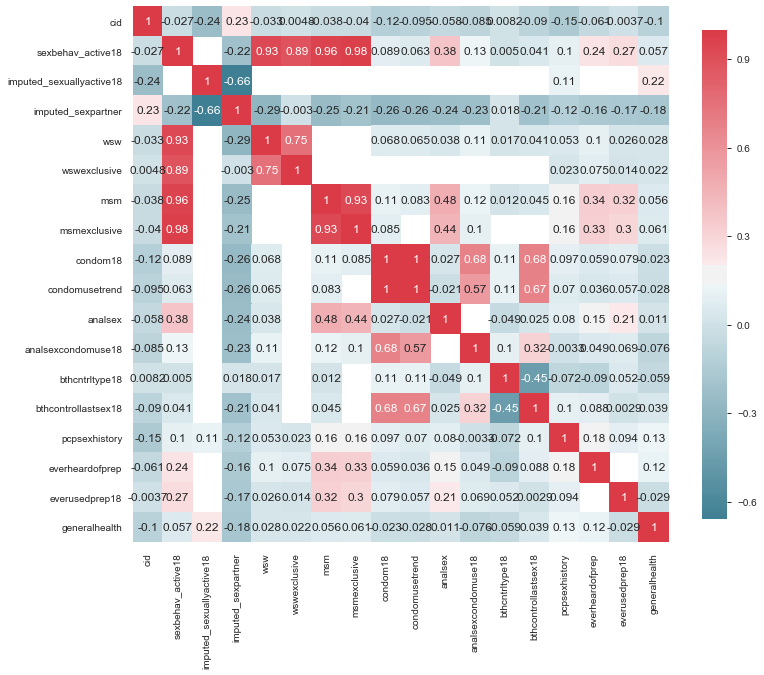

In [78]:
plot_correlation_map(sex_df)

Among all the features in the Sexual Behavior, only 3 features looks useful to me. **imputed_sexuallyactive18**(Sexually active in past 12 months), **imputed_sexpartner** (Number of male and female sex partners in the past 12 months) and **pcpsexhistory** (Thinking about the last time you visited your personal doctor or health care provider, did he or she ask you any questions about your sexual history?).

In [26]:
sex_df = df[['cid','sexpartner','sexuallyactive14','generalhealth']]
sex_df.isnull().sum()


cid                   0
sexpartner          821
sexuallyactive14    821
generalhealth        62
dtype: int64

In [27]:
sex_df_f = sex_df.dropna()
sex_df_f.describe()

,cid,sexpartner,sexuallyactive14,generalhealth
count,7.687000e+03,7687.000000,7687.000000,7687.000000
mean,1.507123e+06,1.815793,1.342656,2.704436
std,5.136951e+03,0.760490,0.474629,1.135526
min,1.500001e+06,1.000000,1.000000,1.000000
25%,1.502138e+06,1.000000,1.000000,2.000000
50%,1.504307e+06,2.000000,1.000000,3.000000
75%,1.512122e+06,2.000000,2.000000,3.000000
max,1.514240e+06,4.000000,2.000000,5.000000


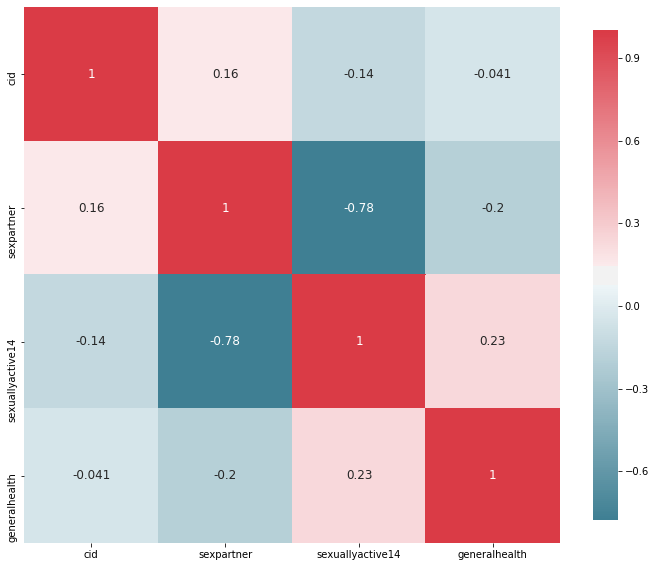

In [28]:
plot_correlation_map(sex_df)

Let us use the above 3 features to predict the general health.

In [29]:
#preparing training and test data
x=sex_df_f[['sexpartner','sexuallyactive14']] 
y=sex_df_f[["generalhealth"]] 

In [30]:
model_apply(x,y,3,2)

[0.88915208 0.11084792]
Predicted Value: [3. 3. 3. ... 2. 3. 3.]
Accuracy: 0.33610822060353795
[[  0  18 291   0   0]
 [  0  34 450   0   0]
 [  0  32 612   0   0]
 [  0  13 353   0   0]
 [  0   5 114   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       309
         2.0       0.33      0.07      0.12       484
         3.0       0.34      0.95      0.50       644
         4.0       0.00      0.00      0.00       366
         5.0       0.00      0.00      0.00       119

    accuracy                           0.34      1922
   macro avg       0.13      0.20      0.12      1922
weighted avg       0.20      0.34      0.20      1922



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1563515050925754

# Clubbing it All together

In [31]:
club_df = df[['cid','everhivtest14','sexpartner','sexuallyactive14','fluvaccineshot','generalhealth']]
club_df.isnull().sum()

cid                   0
everhivtest14       282
sexpartner          821
sexuallyactive14    821
fluvaccineshot       36
generalhealth        62
dtype: int64

In [32]:
club_df = club_df.dropna()
club_df.describe()

,cid,everhivtest14,sexpartner,sexuallyactive14,fluvaccineshot,generalhealth
count,7.426000e+03,7426.000000,7426.000000,7426.000000,7426.000000,7426.000000
mean,1.507156e+06,1.356046,1.823323,1.338810,1.526528,2.704821
std,5.138993e+03,0.478861,0.764023,0.473337,0.499329,1.133213
min,1.500001e+06,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.502155e+06,1.000000,1.000000,1.000000,1.000000,2.000000
50%,1.510014e+06,1.000000,2.000000,1.000000,2.000000,3.000000
75%,1.512138e+06,2.000000,2.000000,2.000000,2.000000,3.000000
max,1.514240e+06,2.000000,4.000000,2.000000,2.000000,5.000000


In [34]:
#preparing training and test data
x=club_df[['everhivtest14','sexpartner','sexuallyactive14','fluvaccineshot']] 
y=club_df[["generalhealth"]] 

In [36]:
model_apply(x,y,3,4)

[0.47086801 0.24659264 0.2252727  0.05726666]
Predicted Value: [3. 2. 3. ... 3. 2. 3.]
Accuracy: 0.32417878298330643
[[  0  95 209   0   0]
 [  0 132 352   0   0]
 [  0 133 470   0   0]
 [  0  57 285   0   0]
 [  0  10 114   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       304
         2.0       0.31      0.27      0.29       484
         3.0       0.33      0.78      0.46       603
         4.0       0.00      0.00      0.00       342
         5.0       0.00      0.00      0.00       124

    accuracy                           0.32      1857
   macro avg       0.13      0.21      0.15      1857
weighted avg       0.19      0.32      0.23      1857



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.154467336208161

**Correlating Number of Sex Partners with the HIV**

In [37]:
hiv_sp_df = df[['everhivtest14','sexpartner']]
hiv_sp_df.isnull().sum()

everhivtest14    282
sexpartner       821
dtype: int64

In [38]:
hiv_sp_df = hiv_sp_df.dropna()
hiv_sp_df.describe()

,everhivtest14,sexpartner
count,7507.000000,7507.000000
mean,1.357533,1.820168
std,0.479305,0.763826
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,2.000000,4.000000


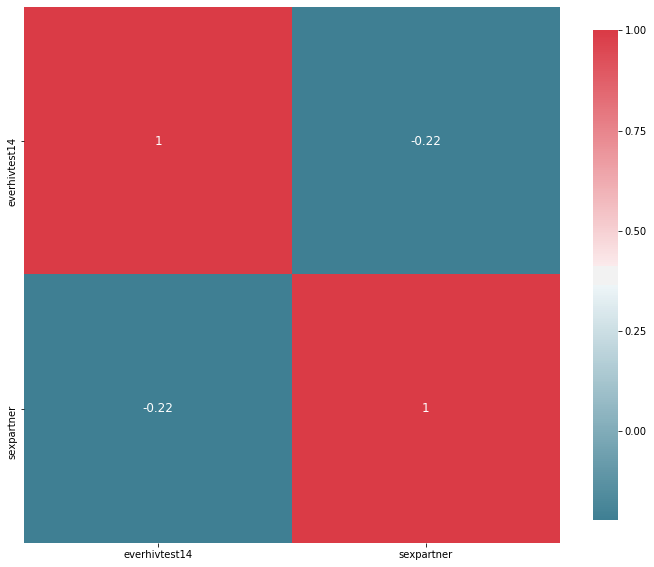

In [39]:
plot_correlation_map(hiv_sp_df)

In [41]:
#preparing training and test data
x=hiv_sp_df[["everhivtest14"]] 
y=hiv_sp_df[["sexpartner"]] 

In [42]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [1. 2. 2. ... 2. 2. 2.]
Accuracy: 0.5695258391049547
[[324 322   0   0]
 [301 745   0   0]
 [ 10  69   0   0]
 [ 23  83   0   0]]
              precision    recall  f1-score   support

         1.0       0.49      0.50      0.50       646
         2.0       0.61      0.71      0.66      1046
         3.0       0.00      0.00      0.00        79
         4.0       0.00      0.00      0.00       106

    accuracy                           0.57      1877
   macro avg       0.28      0.30      0.29      1877
weighted avg       0.51      0.57      0.54      1877



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8228878291290472